In [3]:
import pandas

# load the dataset
dataset = pandas.read_csv('./data/train.csv')
dataset.head()

,Id,Popularity,Page content
0,0,-1,"<html><head><div class=""article-info""> <span c..."
1,1,1,"<html><head><div class=""article-info""><span cl..."
2,2,1,"<html><head><div class=""article-info""><span cl..."
3,3,-1,"<html><head><div class=""article-info""><span cl..."
4,4,-1,"<html><head><div class=""article-info""><span cl..."


In [6]:
from bs4 import BeautifulSoup

# Fetch wordcount for each abstract
dataset['content'] = dataset['Page content'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
dataset[['Page content','content']].head()
# text = BeautifulSoup(text, 'html.parser').get_text()

,Page content,content
0,"<html><head><div class=""article-info""> <span c...",Clara Moskowitz for Space.com 2013-06-19 15:0...
1,"<html><head><div class=""article-info""><span cl...",By Christina Warren2013-03-28 17:40:55 UTCGoog...
2,"<html><head><div class=""article-info""><span cl...",By Sam Laird2014-05-07 19:15:20 UTCBallin': 20...
3,"<html><head><div class=""article-info""><span cl...",By Sam Laird2013-10-11 02:26:50 UTCCameraperso...
4,"<html><head><div class=""article-info""><span cl...",By Connor Finnegan2014-04-17 03:31:43 UTCNFL S...


In [9]:
dataset['word_count'] = dataset['content'].apply(lambda x: len(str(x).split(" ")))
dataset[['content','word_count']].head()



,content,word_count
0,Clara Moskowitz for Space.com 2013-06-19 15:0...,607
1,By Christina Warren2013-03-28 17:40:55 UTCGoog...,341
2,By Sam Laird2014-05-07 19:15:20 UTCBallin': 20...,1412
3,By Sam Laird2013-10-11 02:26:50 UTCCameraperso...,490
4,By Connor Finnegan2014-04-17 03:31:43 UTCNFL S...,1999


In [34]:
dataset['content'][10000]

"By Rex Santus2014-11-03 22:03:53 UTCSay farewell to Windows 7Image: Christof Stache/Associated Press Windows 7 is out the door.  As of late last week, Microsoft  stopped selling the consumer versions of Windows 7 Home Basic, Premium and Ultimate to computer manufacturers. Once the supply runs out, you won't be able to get a new computer with that software installed.  Only Windows 7 Professional was spared, so businesses that need more computers with the software don't need to worry — at least, until next year.  See also: With Windows 10, Microsoft Finally Gets It The changes affect companies that build PCs. Microsoft already stopped selling Windows 7 software packages to the regular public in 2013, but now original equipment manufacturers (OEMs) can't license it, either, meaning they can't build more computers with Windows 7 as the default operating system.  It's unclear how many PCs with Windows 7 pre-installed are still in stock; it might take some time to notice its dismissal.  Win

In [10]:
dataset.word_count.describe()

count    27643.000000
mean       609.997793
std        495.917809
min         37.000000
25%        286.000000
50%        470.000000
75%        784.000000
max       9551.000000
Name: word_count, dtype: float64

In [11]:
# Identify common words
freq = pandas.Series(' '.join(dataset['content']).split()).value_counts()[:20]
freq

the       656835
to        374557
a         336374
of        334089
and       313973
in        231056
on        144661
for       141448
is        131023
that      124579
The       109596
with       95561
you        76430
as         74429
Image:     73433
at         68962
it         67840
—          60907
from       60347
be         59647
dtype: int64

In [12]:
freq1 =  pandas.Series(' '.join(dataset 
         ['content']).split()).value_counts()[-20:]
freq1

buns6               1
Scotia-based        1
fiduciaries         1
UTCSilic:           1
non-obtrusive       1
Beret”              1
30.9%               1
Curtis-penned       1
Future."            1
(Dutch              1
Romano2014-03-21    1
"whyyyyyyy"         1
ZARA                1
99."Image:          1
sonified            1
Olly's              1
LEAKS...WE          1
north.”             1
thinkin             1
(EIN)               1
dtype: int64

In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [14]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [15]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [39]:
corpus = []
for i in range(0, dataset.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['content'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [40]:
corpus[3010]

'neha prakash utctaylor swift lorde biggest fan againlorde performs american music award nov los angeles nothing say bffs eva n eva fangirling besties american music award performance amirite lorde head banging ama performance yellow flicker beat hunger game soundtrack taylor swift perfectly played part best friend see lorde compare meeting pitbull meeting president obama lorde usual exorcism meet dancing thing stage sunday bonus point smearing lipstick face taylor busy losing marble year old performance get u wrong lorde royal something work lorde taylor bow joke creativity lorde taylor swift image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image imgur courtesy abc image courtesy abc sure lorde dementor amas professor snape snape november lorde grim reaper energy anyone performed pettyonc edition bleushock november lorde smeared lipstic

In [41]:
dataset['content'][3010]

'By Neha Prakash2014-11-24 02:53:16 UTCTaylor Swift is Lorde\'s biggest fan, againLorde performs at the 2014 American Music Awards on Nov. 23 in Los Angeles.  Nothing says BFFs 4 eva n eva more than fangirling over your your besties\' American Music Awards\' performance, amirite?  During Lorde\'s head-banging AMA performance of "Yellow Flicker Beat," from the Hunger Games soundtrack, Taylor Swift perfectly played the part of best friend.  See also: Lorde compares meeting Pitbull to meeting President Obama  While Lorde was doing her usual exorcism-meets-dancing thing on stage Sunday — bonus points for smearing her lipstick off her face — Taylor was busy losing her marbles over the 17-year-old\'s performance.   Don\'t get us wrong, Lorde\'s royal on her own, but there\'s something that just works about Lorde & Taylor (**bows for joke creativity**).    Lorde Taylor Swift           Image: Imgur, Courtesy of ABC            Image: Imgur, Courtesy of ABC            Image: Imgur, Courtesy of A

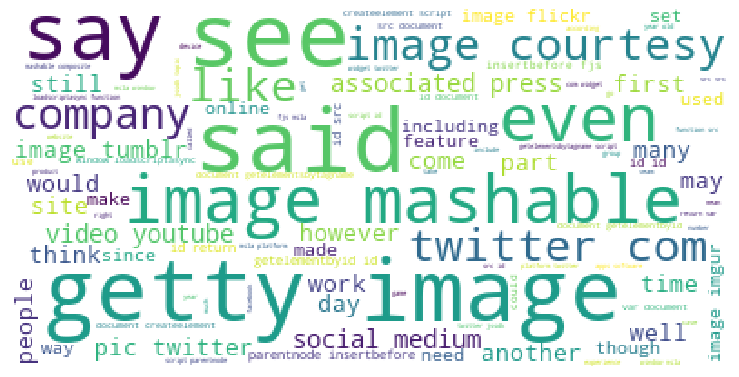

In [42]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8, stop_words=stop_words, max_features=2**20, ngram_range=(1,3))
X = cv.fit_transform(corpus)

In [44]:
list(cv.vocabulary_.keys())[:10]

['clara',
 'moskowitz',
 'space',
 'com',
 'utc',
 'nasa',
 'grand',
 'challenge',
 'stop',
 'asteroid']

[Text(0, 0, 'image'),
 Text(0, 0, 'video'),
 Text(0, 0, 'see'),
 Text(0, 0, 'time'),
 Text(0, 0, 'like'),
 Text(0, 0, 'year'),
 Text(0, 0, 'said'),
 Text(0, 0, 'twitter'),
 Text(0, 0, 'mashable'),
 Text(0, 0, 'topic'),
 Text(0, 0, 'world'),
 Text(0, 0, 'company'),
 Text(0, 0, 'people'),
 Text(0, 0, 'game'),
 Text(0, 0, 'make'),
 Text(0, 0, 'first'),
 Text(0, 0, 'get'),
 Text(0, 0, 'say'),
 Text(0, 0, 'day'),
 Text(0, 0, 'photo')]

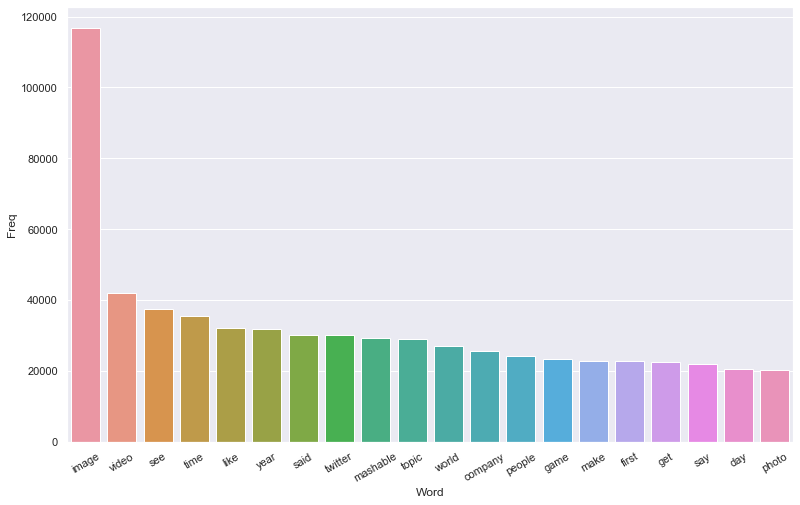

In [45]:
# Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                          Bi-gram   Freq
0                     getty image  13672
1                  image mashable  10513
2                  image courtesy  10146
3                     twitter com   9601
4                associated press   8994
5                   video youtube   8885
6                   social medium   8659
7                    image tumblr   6324
8                     pic twitter   5363
9                    image flickr   5017
10                    image imgur   4467
11        parentnode insertbefore   4059
12              getelementbyid id   4058
13                          id id   4058
14                         id src   4058
15                      id return   4053
16               insertbefore fjs   4052
17        document getelementbyid   4014
18  document getelementsbytagname   4014
19                    id document   4013


[Text(0, 0, 'getty image'),
 Text(0, 0, 'image mashable'),
 Text(0, 0, 'image courtesy'),
 Text(0, 0, 'twitter com'),
 Text(0, 0, 'associated press'),
 Text(0, 0, 'video youtube'),
 Text(0, 0, 'social medium'),
 Text(0, 0, 'image tumblr'),
 Text(0, 0, 'pic twitter'),
 Text(0, 0, 'image flickr'),
 Text(0, 0, 'image imgur'),
 Text(0, 0, 'parentnode insertbefore'),
 Text(0, 0, 'getelementbyid id'),
 Text(0, 0, 'id id'),
 Text(0, 0, 'id src'),
 Text(0, 0, 'id return'),
 Text(0, 0, 'insertbefore fjs'),
 Text(0, 0, 'document getelementbyid'),
 Text(0, 0, 'document getelementsbytagname'),
 Text(0, 0, 'id document')]

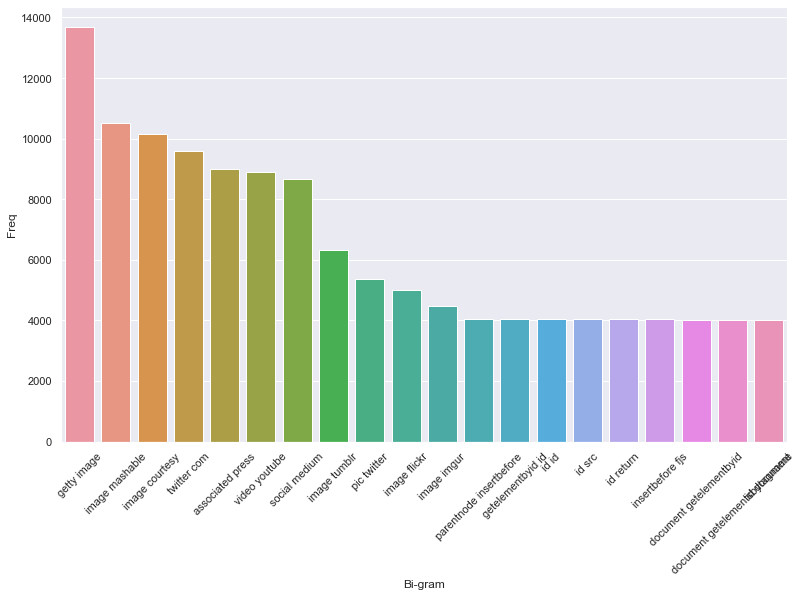

In [46]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                           Tri-gram  Freq
0                   pic twitter com   714
1          getelementbyid id return   524
2                         id id src   524
3       parentnode insertbefore fjs   524
4                window msla window   520
5       msla window loadscriptasync   520
6   window loadscriptasync function   520
7      loadscriptasync function src   520
8                   function src id   520
9                   src id document   520
10       id document getelementbyid   520
11       document getelementbyid id   520
12                    id return var   520
13              return var document   520
14       var document createelement   520
15    document createelement script   520
16          createelement script id   520
17                     script id id   520
18                       id src src   520
19                 src src document   520


[Text(0, 0, 'pic twitter com'),
 Text(0, 0, 'getelementbyid id return'),
 Text(0, 0, 'id id src'),
 Text(0, 0, 'parentnode insertbefore fjs'),
 Text(0, 0, 'window msla window'),
 Text(0, 0, 'msla window loadscriptasync'),
 Text(0, 0, 'window loadscriptasync function'),
 Text(0, 0, 'loadscriptasync function src'),
 Text(0, 0, 'function src id'),
 Text(0, 0, 'src id document'),
 Text(0, 0, 'id document getelementbyid'),
 Text(0, 0, 'document getelementbyid id'),
 Text(0, 0, 'id return var'),
 Text(0, 0, 'return var document'),
 Text(0, 0, 'var document createelement'),
 Text(0, 0, 'document createelement script'),
 Text(0, 0, 'createelement script id'),
 Text(0, 0, 'script id id'),
 Text(0, 0, 'id src src'),
 Text(0, 0, 'src src document')]

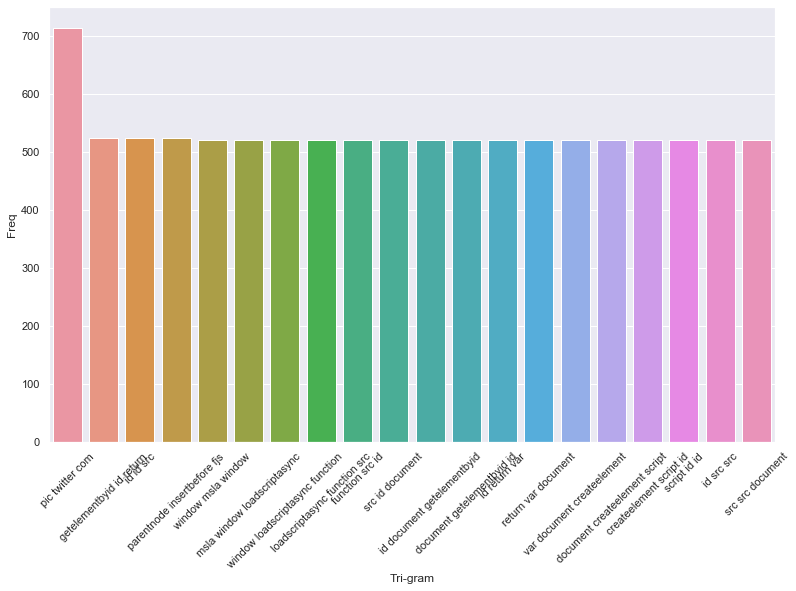

In [26]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [38]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords = extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k, keywords[k])


Abstract:
clara moskowitz space com utc nasa grand challenge stop asteroid destroying earth may killer asteroid headed earth nasa decided something space agency announced grand challenge june find dangerous space rock figure stop destroying planet mission build project already underway nasa including plan capture asteroid pull toward moon send astronaut visit part grand challenge agency issued request information today aiming solicit idea industry academia public improve asteroid mission plan asking think concept different approach described william gerstenmaier nasa associate administrator human exploration operation said yesterday nasa event announcing initiative want think way enhancing get see work nasa asteroid captureresponses request information seek idea detecting mitigating asteroid threat due july asteroid retrieval mission designed provide first deep space mission astronaut flying nasa space launch system rocket orion space capsule development come fire lawmaker would prefe